In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# <center> Representación de resultados. MLQAE </center>

A continuación se presentan los resultados de las salidas del MLQAE. 

- Se leen de forma sencilla (con pandas) los ficheros generados con los resultados del MLQAE (tanto en un ordenador real como en el simulador)
- Se representan los resultados con Matplotlib

In [2]:
sim_res = pd.read_csv(r"../../Output/MLQAE_vFin_results_SIM_QASM_10.csv").drop(["Unnamed: 0"], axis = 1)
sim_res

,n_grovers,theta_candidate,a_candidate,rel_error,n_shots,execc_index,analytical_result
0,0,0.330423,0.105263,0.414018,32,1,0.179636
1,1,0.409515,0.158535,0.117464,32,1,0.179636
2,2,0.416821,0.163908,0.087554,32,1,0.179636
3,4,0.443700,0.184284,0.025880,32,1,0.179636
4,0,0.538663,0.263158,0.464954,64,1,0.179636
...,...,...,...,...,...,...,...
235,4,0.439523,0.181057,0.007914,512,10,0.179636
236,0,0.476680,0.210526,0.171963,1024,10,0.179636
237,1,0.447266,0.187058,0.041318,1024,10,0.179636
238,2,0.443352,0.184015,0.024382,1024,10,0.179636


In [3]:
real_res = pd.read_csv(r"../../Output/MLQAE_vFin_results_REAL_QASM_10.csv").drop(["Unnamed: 0"], axis = 1)
real_res

,n_grovers,theta_candidate,a_candidate,rel_error,n_shots,execc_index,analytical_result
0,0,0.538663,0.263158,0.464954,32,1,0.179636
1,1,0.696963,0.412025,1.293674,32,1,0.179636
2,2,0.777071,0.491674,1.737061,32,1,0.179636
3,4,0.773139,0.487742,1.715177,32,1,0.179636
4,0,0.538663,0.263158,0.464954,64,1,0.179636
...,...,...,...,...,...,...,...
235,4,0.406400,0.156266,0.130093,512,10,0.179636
236,0,0.538663,0.263158,0.464954,1024,10,0.179636
237,1,0.614025,0.331962,0.847976,1024,10,0.179636
238,2,0.589087,0.308694,0.718445,1024,10,0.179636


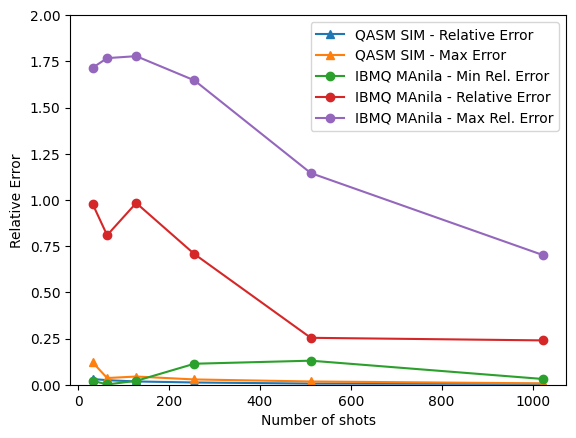

In [4]:
sim_mean_error_4_grover = pd.DataFrame(sim_res[sim_res["n_grovers"] == 4].groupby(["n_shots", "n_grovers"])["rel_error"].mean().reset_index())
sim_max_error_4_grover = pd.DataFrame(sim_res[sim_res["n_grovers"] == 4].groupby(["n_shots", "n_grovers"])["rel_error"].max().reset_index())
sim_min_error_4_grover = pd.DataFrame(sim_res[sim_res["n_grovers"] == 4].groupby(["n_shots", "n_grovers"])["rel_error"].min().reset_index())


real_mean_error_4_grover = pd.DataFrame(real_res[real_res["n_grovers"] == 4].groupby(["n_shots", "n_grovers"])["rel_error"].mean().reset_index())
real_max_error_4_grover = pd.DataFrame(real_res[real_res["n_grovers"] == 4].groupby(["n_shots", "n_grovers"])["rel_error"].max().reset_index())
real_min_error_4_grover = pd.DataFrame(real_res[real_res["n_grovers"] == 4].groupby(["n_shots", "n_grovers"])["rel_error"].min().reset_index())


# Plot sim
plt.plot(sim_mean_error_4_grover["n_shots"], sim_mean_error_4_grover["rel_error"], "-^")
plt.plot(sim_max_error_4_grover["n_shots"], sim_max_error_4_grover["rel_error"], "-^")

# Plot real quantum computer
plt.plot(real_min_error_4_grover["n_shots"], real_min_error_4_grover["rel_error"], "-o")
plt.plot(real_mean_error_4_grover["n_shots"], real_mean_error_4_grover["rel_error"], "-o")
plt.plot(real_max_error_4_grover["n_shots"], real_max_error_4_grover["rel_error"], "-o")


plt.ylim(0,2)
plt.xlabel("Number of shots")
plt.ylabel("Relative Error")
plt.legend(["QASM SIM - Relative Error", "QASM SIM - Max Error", "IBMQ MAnila - Min Rel. Error",
            "IBMQ MAnila - Relative Error", "IBMQ MAnila - Max Rel. Error"])

plt.show()

## A continuación se presenta uno de los resultados de la gráfica superior: 

### <b> Error relativo mínimo obtenido con $Q^4$ a lo largo de varias ejecuciones con varios $N_shots$ </b> en un ordenador real (IBMQ_MANILA)


In [5]:
real_min_error_4_grover

,n_shots,n_grovers,rel_error
0,32,4,0.021484
1,64,4,0.001595
2,128,4,0.020810
3,256,4,0.113561
4,512,4,0.130093
5,1024,4,0.030811
